In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/131_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/131_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/131_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/131_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/131_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/131_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/131_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/131_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.961436,47.320354,5958.262018,77.189779,2.007199e+15,59.246525,0.848713
0,XGBoost,0.943827,65.141109,8678.952448,93.160895,3.075531e+15,0.849385,0.022005
0,Decision Tree,0.930175,60.312687,10788.363367,103.867047,1.901916e+15,0.949610,0.017882
0,MLP,0.807969,128.726132,29669.714748,172.248991,5.509553e+15,139.969055,0.044466
0,Linear Regression,0.365562,255.023798,98023.904239,313.087694,5.487181e+15,0.209316,0.021400
0,Lasso,0.364150,255.667293,98242.052555,313.435883,5.509040e+15,1.065379,0.007776
0,Elastic Net,0.305605,273.138894,107287.519163,327.547736,5.542033e+15,0.109744,0.009179
0,Logistic Regression,-0.026379,275.926597,158580.803650,398.222053,1.996500e+15,375.341289,0.578243


In [6]:
metrics.to_csv("./metrics/132_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


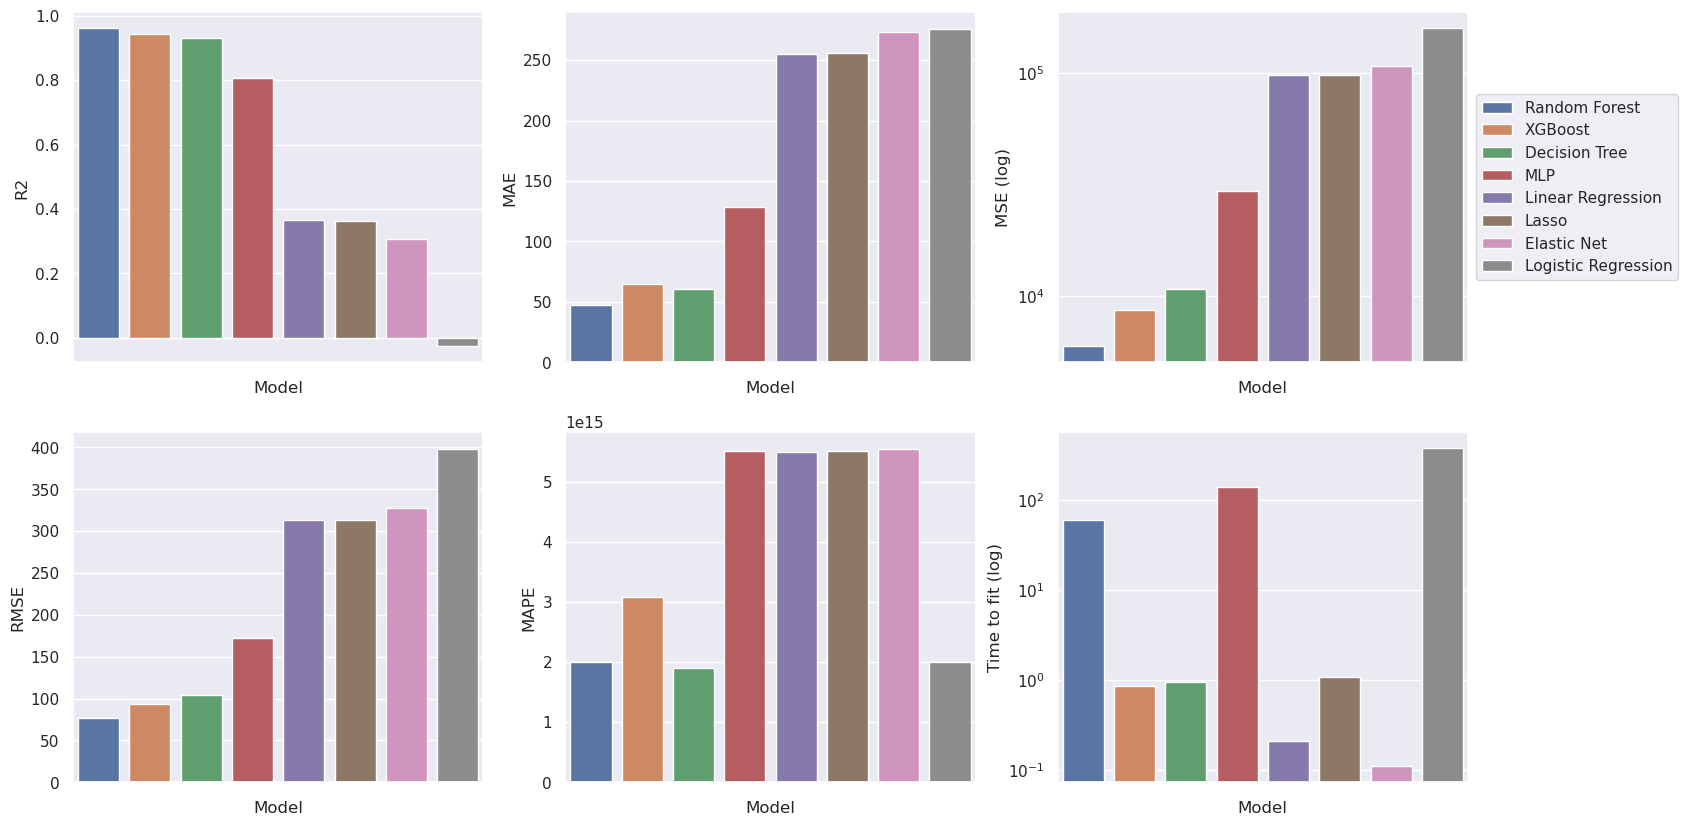

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE (log)", yscale="log")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/132_gardiner_count_weather_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/132_gardiner_count_weather_incidents_metrics.png",bbox_inches="tight")